<a href="https://colab.research.google.com/github/ZeusKwon/AI_04_project/blob/main/n212a_multiple_regression_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 2*

# 📝 Assignment
---

# 다중선형회귀(Multiple Linear Regression)

이번 과제에서도 n211 과제 에서 다루었던 housing price dataset을 가지고 배운 내용을 연습해 보겠습니다.
다음 링크에서 다운로드 받아 사용해 주세요. [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [3]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')


In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1) 데이터는 May 2014 ~ May 2015 의 2년치 데이터입니다. 2015-01-01 부터 큰 날짜의 데이터는 테스트, 그 이외의 데이터는 훈련 데이터셋으로 나누어 주세요
- **훈련데이터 샘플의 갯수를 과제 제출폼에 제출하세요.**

In [5]:
df['date'] = df.date.str.split('T', expand=True)

In [6]:
pd.to_datetime(df.date)

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [7]:
test = df[df.date > '2015-01-01'] #2015년 이후 데이터는 test로
train = df.drop(test.index) # 그 외 데이터는 train으로

In [ ]:
len(train)

14633

### 2) 두 특성(bathrooms, sqft_living)을 사용해서 다중선형회귀 모델을 만들어 보세요
- 학습시 Parameters는 모두 기본값으로 합니다.
- **테스트세트의 MAE 값을 과제 제출폼에 제출하세요.**

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
# label 정의
target = 'price'
y_train = train[target]
y_test = test[target]

# 다중모델 학습을 위한 특성

features = ['bathrooms', 
            'sqft_living']
X_train = train[features]
X_test = test[features]


In [9]:
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:}')

훈련 에러: 170777.34212565765


In [10]:
# 테스트 데이터에 적용해 봅시다 
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:}')

테스트 에러: 179252.52593261775


### 3) 모델의 회귀계수(coefficients)와 절편(intercept)을 확인해 보세요.
- **sqft_living의 회귀계수를 과제 제출폼에 제출하세요.**

In [11]:
#  bathrooms , sqft_living  회귀 계수
model.coef_

array([-5158.92591411,   286.13753555])

In [12]:
# sqft_living  회귀 계수
model.coef_[1]

286.1375355497683

In [13]:
# sqft_living, bathrooms 절편
model.intercept_

-50243.56279640319

In [14]:
# 다중회귀 계수와 절편
import statsmodels.api as sm;

# 독립변수 : 'sqft_living' 종속변수 : 'price'
df['intercept'] = 1
lm = sm.OLS(df['price'], df[['intercept','sqft_living','bathrooms']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.050e+04
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        06:29:16   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21610   BIC:                         6.006e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept   -3.946e+04   5223.129     -7.554      0.000   -4.97e+04   -2.92e+04
sqft_living   283.8919      2.951     96.194      0.000     278.107     289.677
bathrooms   -5164.6004   3519.452     -1.467      0.142   -1.21e+04    1733.784
==============================================================================
Omnibus:                    14813.700   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           544228.270
Skew:                           2.819   Prob(JB):                         0.00
Kurtosis:                      26.928   Cond. No.                     7.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 다중회귀 계수와 절편
import statsmodels.api as sm;

# 독립변수 : 'sqft_living' 종속변수 : 'price'
lm = sm.OLS(df['price'], df[['sqft_living','bathrooms']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                          5.644e+04
Date:                Wed, 09 Jun 2021   Prob (F-statistic):                        0.00
Time:                        06:44:26   Log-Likelihood:                     -3.0029e+05
No. Observations:               21613   AIC:                                  6.006e+05
Df Residuals:                   21611   BIC:                                  6.006e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   281.6659      2.940     95.795      0.000     275.903     287.429
bathrooms   -1.947e+04   2970.389     -6.555      0.000   -2.53e+04   -1.36e+04
==============================================================================
Omnibus:                    15542.464   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           626792.603
Skew:                           3.002   Prob(JB):                         0.00
Kurtosis:                      28.690   Cond. No.                     3.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

왜 OLS함수를 써서 다중회귀계수를 쓰면 위의 값과 다른값이 나올까요?  
이 부분은 더 찾아봐야할것 같네요

### 4) MSE, RMSE, MAE, $R^2$ 를 훈련/테스트 데이터에 대해 확인해 보세요
- **테스트 데이터에 대한 R^2 값을 과제 제출폼에 제출하세요.**

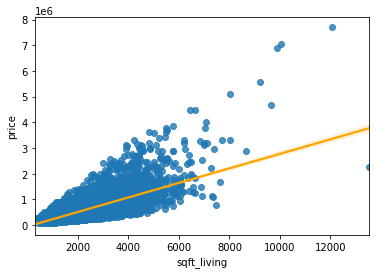

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련데이터 시각화
sns.regplot(x=train['sqft_living'], y=train['price'],line_kws={'color': 'orange'});

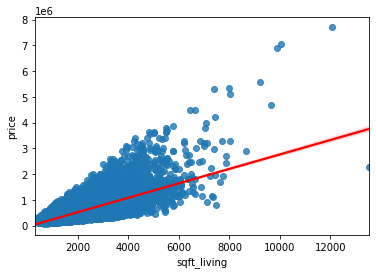

In [16]:
# 전체데이터 시각화
sns.regplot(x=df['sqft_living'], y=df['price'],line_kws={'color': 'red'});

In [17]:
# 훈련 데이터에 대한 확인
from IPython.display import display
from matplotlib.patches import Rectangle
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

def evaluation_metrics(feature, target):
  '''
  2d 선형회귀직선과 제곱오차(squared errors)를 확인하기 위한 함수
  df : Pandas 데이터프레임
  feature : 특징 열
  target : 타겟 열
  slope : 선형방정식의 기울기
  intercept : 선형방정식의 y 절편
  '''
  X_train = train[feature]
  X_test = test[feature]
  y_train = train[target]
  y_test = test[target]
  model = LinearRegression()
  model.fit(X_train, y_train) #모델 fit
  train_y_pred = model.predict(X_train)
  test_y_pred = model.predict(X_test)

  # 회귀방정식 평가지표
  train_mse = mean_squared_error(y_train, train_y_pred)
  train_mae = mean_absolute_error(y_train, train_y_pred)
  train_rmse = train_mse ** 0.5
  train_r2 = r2_score(y_train, train_y_pred)

  test_mse = mean_squared_error(y_test, test_y_pred)
  test_mae = mean_absolute_error(y_test, test_y_pred)
  test_rmse = test_mse ** 0.5
  test_r2 = r2_score(y_test, test_y_pred)

  display(pd.DataFrame([[train_mse,train_mae,train_rmse, train_r2], 
                       [test_mse, test_mae, test_rmse, test_r2]],
          columns=['MSE', 'MAE', 'RMSE', 'R2'],
          index = ['Train', 'Test']))
  

**MSE** : Mean Squared Error.

가장 일반적이고 직관적인 에러 지표다.

관측된 값에서 예측값을 뺀 뒤, 제곱한 값을 평균낸 값이다. 값은 낮을수록 좋다.

스케일에 의존적이라는 단점이 있다.

**MAE** : 예측값에 실제값을 뺀 값을 절대값한 평균이다.

에러의 값 그 자체를 나타낸다.

**RMSE** : MSE를 제곱근한 값이다.

역시 값은 낮을수록 좋다.

에러 자체의 평균을 직관적으로 보여준다.

**R2(R-Squared)** : 예측치와 평균의 차이 제곱의 평균 / 관측치와 평균의 차이 제곱의 평균

In [20]:
# 1개 feature(sqft_living) 사용 시 결과
pd.options.display.float_format = '{:,}'.format

In [21]:
# 2개 feature(sqft_living,bathrooms) 사용 시 결과

evaluation_metrics(['sqft_living', 'bathrooms'], 'price')

,MSE,MAE,RMSE,R2
Train,"67,099,053,309.953606","170,777.34212565763","259,034.84960513248",0.5076085988757708
Test,"71,083,994,178.75656","179,252.52593261775","266,615.81757044455",0.45999300199894533


In [22]:
from IPython.display import display
from matplotlib.patches import Rectangle

def evaluation_metrics(df, feature, target, slope, intercept):
    """
    2d 선형회귀직선과 제곱오차(squared errors)를 확인하기 위한 함수
    df : Pandas 데이터프레임
    feature : 특징 열
    target : 타겟 열
    slope : 선형방정식의 기울기
    intercept : 선형방정식의 y 절편
    """
    
    x = df[feature]
    y = df[target]
    
    # plot 데이터
    ax = plt.axes()
    df.plot.scatter(feature, target, ax=ax)
    
    # 예측
    y_pred = slope * x + intercept
    
    # plot 예측
    ax.plot(x, y_pred)
    
    # Plot 제곱오차(MSE)
    x_left, x_right = ax.get_xlim() # x-axis view limits
    y_bottom, y_top = ax.get_ylim()
    scale = (x_right - x_left) / (y_top - y_bottom)

    for f, t, p in zip(x, y, y_pred):
        xy = (f, min(t, p))
        h = abs(t - p)
        w_scaled = h * scale
        ax.add_patch(Rectangle(xy=xy, width=w_scaled, height=h, alpha=0.2))
    
    # 회귀방정식 평가지표
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y, y_pred)

    display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,"68,351,286,833.039825"
1,MAE,"173,688.27336044516"
2,RMSE,"261,440.79030067177"
3,R2,0.4928532179037931


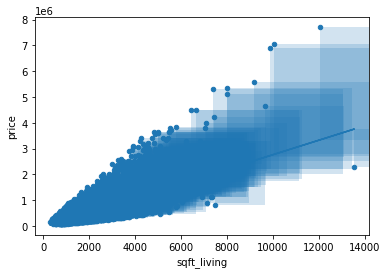

In [23]:
evaluation_metrics(df, 'sqft_living', 'price', 280.6235679,-43580.74309447)

,Metric,Score
0,MSE,"70,875,204,309.93"
1,MAE,"179,192.45"
2,RMSE,"266,223.97"
3,R2,0.46


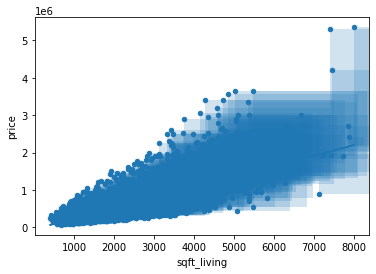

In [ ]:
evaluation_metrics(test, 'sqft_living', 'price', 280.6235679,-43580.74309447)

,Metric,Score
0,MSE,"67,147,368,020.17"
1,MAE,"171,062.76"
2,RMSE,"259,128.09"
3,R2,0.51


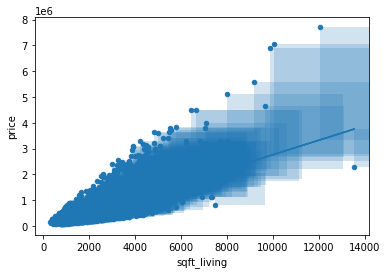

In [ ]:
evaluation_metrics(train, 'sqft_living', 'price', 280.6235679,-43580.74309447)

## 🔥도전과제

### 5) 두가지 이상 특성을 선택하여 특성공학(feature engineering)을 진행합니다. (kaggle notebook을 참고하여 중요한 특성을 고르는 것이 힌트입니다.)
- EDA를 자세히 진행하세요
- 특성공학 과정을 자세히 기술하세요
- 특성공학을 거친 특성을 포함해 다수의 특성을 사용한 모델을 학습하고 테스트 데이터에 대해 MSE, RMSE, MAE, R2 스코어를 계산하고 분석하세요
- 만들어진 회귀계수를 사용해 모델을 설명하세요.
- 모델이 과적합인지/과소적합인지 설명하세요.
- 메신저 general 채널에서 4개 스코어를 제시하고 본인이 고른 특성, 특성공학 방법 등을 간략하게 공유하세요

In [ ]:
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# 
# 두가지 이상의 중요한 특성을 파악하기


In [ ]:
df.corr()['price'].sort_values(ascending=False).iloc[1:]

sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

## 참고자료
* [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
* ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)
* [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf)
* [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
* [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)